# Basics of Tensorflow: Classification of clothes

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Import Fashion MNIST dataset

In [3]:
fashion = tf.keras.datasets.fashion_mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels

In [5]:
train_imgs.shape

(60000, 28, 28)

In [6]:
train_lbls.shape

(60000,)

In [7]:
train_lbls

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_imgs.shape

(10000, 28, 28)

In [9]:
test_lbls.shape

(10000,)

We have 60000 train samples, represented by images of size 28x28 and 10000 test samples of the same representation. Labels are numbers from 0 to 9 for each type of clothing.

### Preprocessing

The data must be preprocessed before training the network.

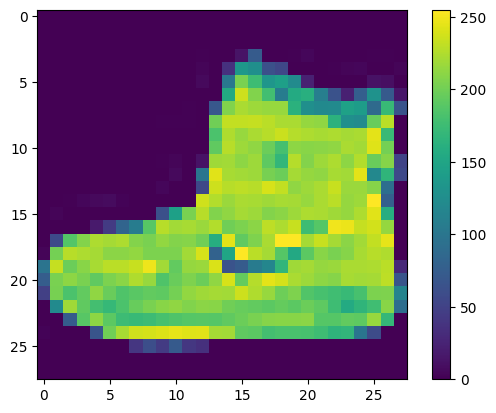

In [11]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

If we inspect the first image in the training set, we will see that the pixel values fall in the range of 0 to 255. We can scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. We do the same with the test set.

In [12]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

train_imgs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

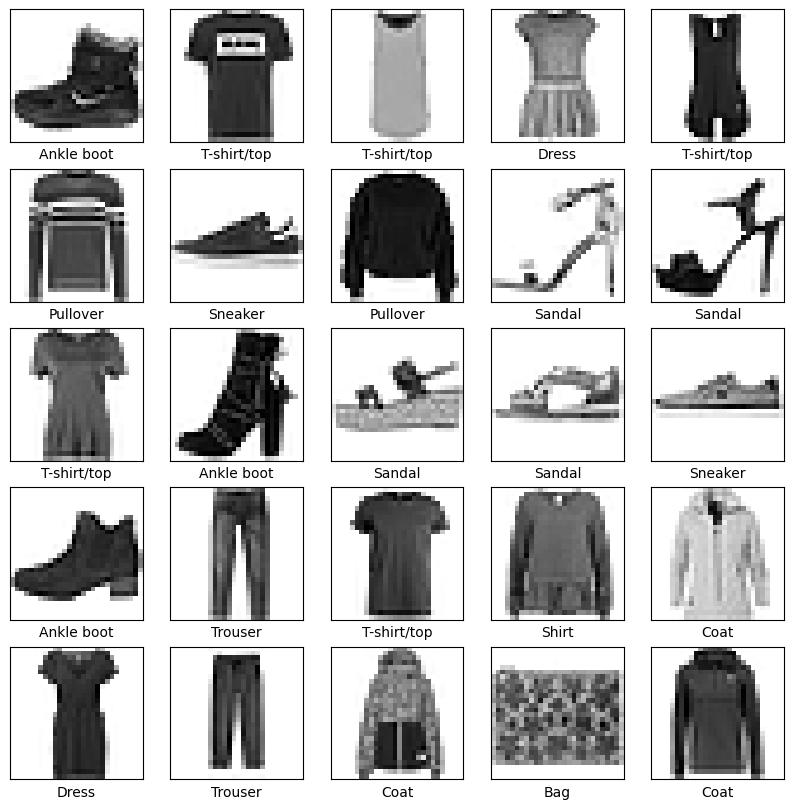

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lbls[i]])
plt.show()

### Building the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.
- After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.


Now we have to compile the model, for this we use:
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [19]:
model.fit(train_imgs, train_lbls, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5017 - accuracy: 0.8237
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3774 - accuracy: 0.8640
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.8771
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8849
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8905
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8969
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2724 - accuracy: 0.8982
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9030
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9068
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

This model reaches accuracy of about 92%.

### Evaluating the accuracy

We know evaluate the accuracy on the test set.

In [20]:
test_loss, test_acc = model.evaluate(test_imgs, test_lbls, verbose=2)

313/313 - 1s - loss: 0.3398 - accuracy: 0.8859 - 666ms/epoch - 2ms/step


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Making predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [22]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_imgs)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set.

In [24]:
predictions[0]

array([7.1100210e-09, 4.0370902e-13, 3.0395350e-10, 8.5404669e-11,
       5.0146901e-11, 3.3455176e-06, 2.9595804e-10, 7.7449932e-04,
       1.1351286e-10, 9.9922216e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.
We can find the predicted label via using argmax.

In [25]:
np.argmax(predictions[0])

9

Label 9 has the highest confidence value.

In [26]:
test_lbls[0]

9

The prediction is correct.

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifying the predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

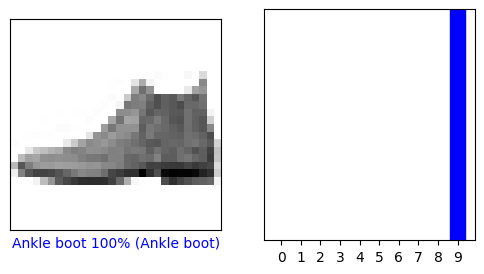

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lbls, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lbls)
plt.show()

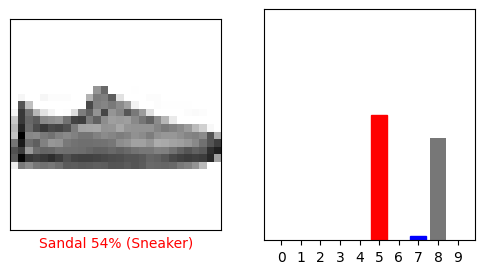

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lbls, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lbls)
plt.show()

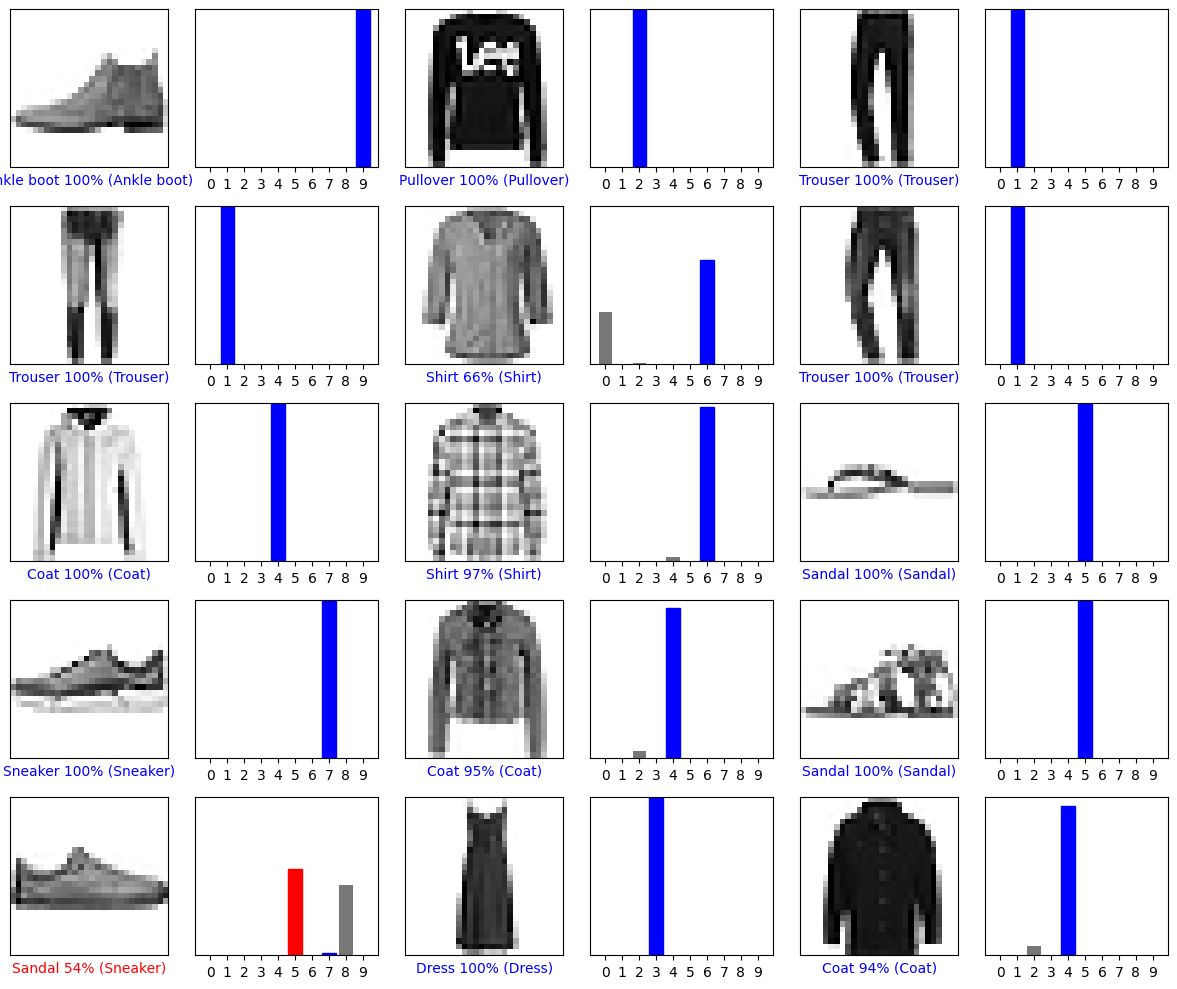

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_lbls, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_lbls)
plt.tight_layout()
plt.show()

### Using the trained model to predict the label of a single image



In [36]:
# Grab an image from the test dataset.
img = test_imgs[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list.

In [37]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 42ms/step
[[1.9909825e-05 3.1858961e-16 9.9960786e-01 6.5696104e-15 3.1746662e-04
  2.0167501e-11 5.4813070e-05 1.9459143e-19 6.4613719e-15 9.1762339e-14]]


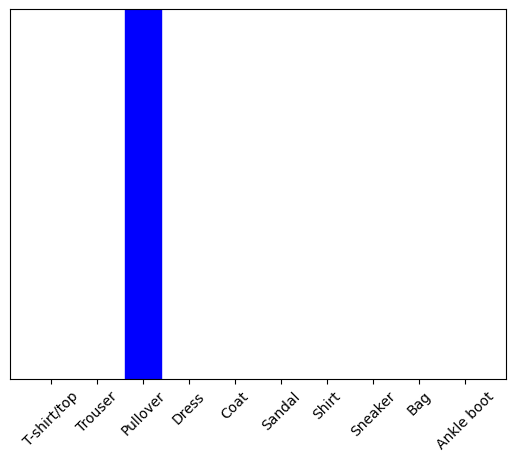

In [40]:
plot_value_array(1, predictions_single[0], test_lbls)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch.

In [41]:
np.argmax(predictions_single[0])

2

The model predicted the label for this particular image correctly.